In [60]:
import pandas as pd
import numpy as np
import pickle
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from random import sample
from mpl_toolkits.mplot3d import Axes3D

In [4]:
movie_mappings = pickle.load(open('data/scores.p', 'rb'))

In [7]:
movie_mappings

{318: [array([ 0.01040424, -0.03711091, -0.01370902, -0.04845009,  0.01658836]),
  array([-0.05456358,  0.01788222, -0.03426719,  0.0621023 , -0.01425169])],
 356: [array([ 0.0127792 , -0.0359046 , -0.02943497, -0.05522026,  0.00883689]),
  array([-0.05047418, -0.01912659, -0.05016158,  0.04780397, -0.02171374])],
 296: [array([ 0.00360225, -0.02826421, -0.01891575, -0.0462336 ,  0.02002684]),
  array([-0.08970943, -0.02482225, -0.00100773,  0.06035912,  0.00692485])],
 593: [array([ 0.0037321 , -0.02950427, -0.01274366, -0.04523834,  0.01826181]),
  array([0.02556644, 0.01842124, 0.04656378, 0.09000344, 0.04494213])],
 2571: [array([ 0.01454861, -0.04172054, -0.01053092, -0.05062554,  0.01260453]),
  array([-0.04075528, -0.03518132, -0.01541651, -0.00211792, -0.00348132])],
 260: [array([ 0.00361753, -0.03669814, -0.01220311, -0.04592303,  0.01172128]),
  array([-0.01227399, -0.030684  , -0.01311709,  0.20178221, -0.00523552])],
 480: [array([ 0.02494134, -0.04054819, -0.02850884, -0.

In [10]:
tags = []
summaries = []
combo = []
movies = []

for movie in movie_mappings:
    tags.append(movie_mappings[movie][0])
    summaries.append(movie_mappings[movie][1])
    combo.append(np.add(movie_mappings[movie][0],movie_mappings[movie][1])/2)
    movies.append(movie)

In [16]:
tags32 = np.array(tags, dtype=np.float32)

In [27]:
tags[717:720]

[array([ 0.01938918, -0.03296261, -0.02874923, -0.0453457 ,  0.00752516]),
 array([nan, nan, nan, nan, nan]),
 array([ 0.00894341, -0.04097068, -0.0252706 , -0.05009676,  0.00540287])]

In [28]:
movies[718]

720

In [29]:
summaries[718]

array([-0.00504162, -0.03662107, -0.03425704, -0.01117988,  0.02319281])

In [31]:

embedded = TSNE(n_components=2, random_state=1, verbose=True, perplexity=10.0).fit_transform(summaries)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1500 samples in 0.003s...
[t-SNE] Computed neighbors for 1500 samples in 0.051s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1500
[t-SNE] Computed conditional probabilities for sample 1500 / 1500
[t-SNE] Mean sigma: 0.015161
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.617821
[t-SNE] KL divergence after 1000 iterations: 1.233536


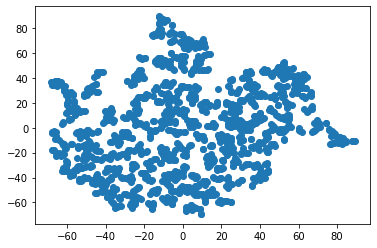

In [37]:
plt.scatter(embedded[:, 0], embedded[:,1])

In [50]:
user_mappings = pickle.load(open('data/user_subspace_scores.pkl', 'rb'))

In [51]:
user_mappings

{1: array([-0.07464365, -0.01914677, -0.15758435, -0.04446664, -0.13863027]),
 2: array([-0.05305937, -0.07656725, -0.05648102, -0.12947529, -0.01474609]),
 3: array([-0.17575921, -0.04619338,  0.00256565,  0.02605886,  0.03936388]),
 4: array([-1.        ,  0.52346284, -1.        ,  0.33292119,  0.05856343]),
 5: array([-0.53454422, -0.76470976, -0.41184099, -0.25200664,  0.54447932]),
 6: array([-0.17335394, -0.08251499,  0.09681196,  0.07127452, -0.1691033 ]),
 7: array([-0.00540836,  0.03054692,  0.06747463,  0.08532309, -0.01355678]),
 8: array([-0.25545807,  0.03163915, -0.19287216,  0.01803553, -0.20038994]),
 10: array([ 0.01112827, -1.        , -0.66266989,  1.        ,  0.18850413]),
 11: array([-0.09369792, -0.08639201, -0.17817542,  0.00493242,  0.00018107]),
 12: array([ 0.02092026,  0.3691282 ,  0.22482684,  0.12774017, -0.08202966]),
 13: array([nan, nan, nan, nan, nan]),
 14: array([-0.56655876, -1.        , -0.83779402, -1.        ,  0.22175693]),
 15: array([-0.774876

In [56]:
clean_users = []
for i in user_mappings:
    if(not np.isnan(user_mappings[i]).any()):
        clean_users.append(user_mappings[i])

In [62]:
embedded_users = TSNE(n_components=2, random_state=1, verbose=True, perplexity=10.0).fit_transform(sample(clean_users, 10000))

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.037s...
[t-SNE] Computed neighbors for 10000 samples in 0.941s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.129921
[t-SNE] KL divergence after 1000 iterations: 1.878166


In [70]:
users_pca = TruncatedSVD(n_components=2, random_state=1, algorithm='arpack').fit_transform(clean_users)

In [71]:
plot_data = embedded_users[np.random.choice(embedded_users.shape[0], 1000, replace=False)]
user_pca_plot = users_pca[np.random.choice(users_pca.shape[0], 1000, replace=False)]

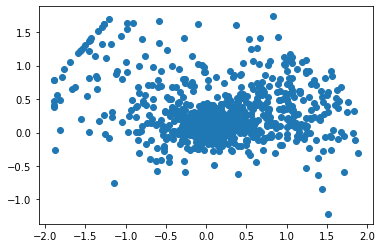

In [72]:
plt.scatter(user_pca_plot[:, 0], user_pca_plot[:,1])

In [74]:
from sklearn import mixture
from sklearn import metrics
from tqdm import tqdm

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
    plt.title("GMM with %d components"%len(gmm.means_), fontsize=(20))
    plt.xlabel("U.A.")
    plt.ylabel("U.A.")
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [75]:



n_clusters=np.arange(2, 20)
sils=[]
sils_err=[]
iterations=20
for n in tqdm(n_clusters):
    tmp_sil=[]
    for _ in range(iterations):
        gmm=mixture.GaussianMixture(n, n_init=2).fit(summaries) 
        labels=gmm.predict(summaries)
        sil=metrics.silhouette_score(summaries, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

100%|████████████████████████████████████████████| 18/18 [02:33<00:00,  8.52s/it]


Text(0, 0.5, 'Score')

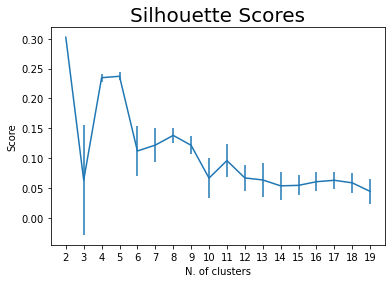

In [76]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

In [77]:
def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

In [80]:
from sklearn.model_selection import train_test_split
n_clusters=np.arange(2, 20)
iterations=20
results=[]
res_sigs=[]
for n in tqdm(n_clusters):
    dist=[]
    
    for iteration in range(iterations):
        train, test=train_test_split(summaries, test_size=0.5)
        
        gmm_train=mixture.GaussianMixture(n, n_init=2).fit(train) 
        gmm_test=mixture.GaussianMixture(n, n_init=2).fit(test) 
        dist.append(gmm_js(gmm_train, gmm_test))
    selec=SelBest(np.array(dist), int(iterations/5))
    result=np.mean(selec)
    res_sig=np.std(selec)
    results.append(result)
    res_sigs.append(res_sig)

100%|████████████████████████████████████████████| 18/18 [12:51<00:00, 42.86s/it]


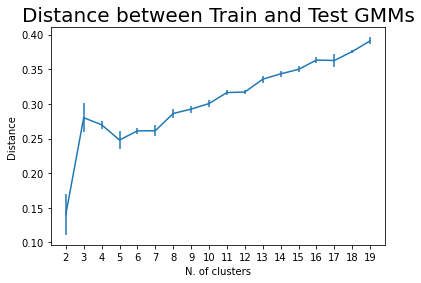

In [81]:
plt.errorbar(n_clusters, results, yerr=res_sigs)
plt.title("Distance between Train and Test GMMs", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Distance")
plt.show()

In [86]:
n_clusters=np.arange(2, 20)
bics=[]
bics_err=[]
iterations=20
for n in tqdm(n_clusters):
    tmp_bic=[]
    for _ in range(iterations):
        gmm=mixture.GaussianMixture(n, n_init=2).fit(summaries) 
        
        tmp_bic.append(gmm.bic(np.array(summaries)))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

100%|████████████████████████████████████████████| 18/18 [02:35<00:00,  8.62s/it]


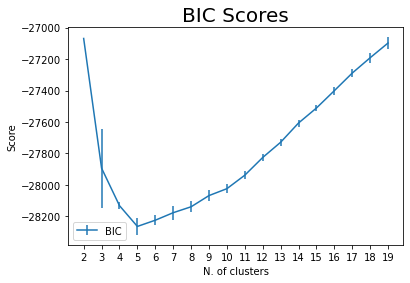

In [87]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

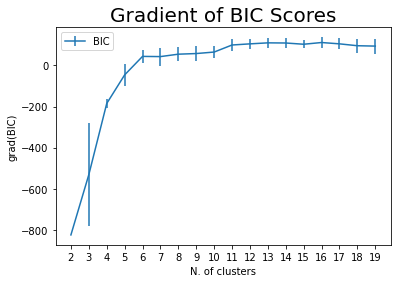

In [88]:
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()